Junior Data Science Test: **Diego Zúñiga Blassio**

# Introduction

The Telco Customer Churn Dataset has information about different customers. Each row it's an observation about a customer's features, such as: Gender, Partner, Dependants, services, charges, etc.

The objective is to predict whether the client left the company or stayed using a machine learning model from these features.

### Models

Since we have a binary classification problem we have several models we can use to achieve the target variable: 

1.  **Logistic Regression**
    - Easier to implement, interpret, and very efficient to train.
    
    
2.  **Artificial Neural Networks**
    - ANNs have the ability to learn and model non-linear and complex relationships.
    
    
3.  **Support Vector Machine**
    - Handle High dimensional data and do not suffer condition of overfitting 
    
    
4.  **K-Nearest Neighbors**
    - Simple  to interpret and Versatile- Quik calculation time.
    
    
    
Each of these models has its disadvantages, which we will not cover for this occasion.


## First look at the Data

In [1]:
#Libraries 
import numpy as np #linear algebra
import pandas as pd #data manipulation and processing
import matplotlib.pyplot as plt #Visualization 
import seaborn as sns #Visualization

In [2]:
#Read the data
url = 'https://raw.githubusercontent.com/martmor123/jr_ds_test/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#The first insight we noticed is that customerID has no impact on the behaviour of the model. We drop it.
df = df.reset_index(drop=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Data Shape
df.shape

(7043, 20)

In [5]:
#Data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Total Charges is an object type, we change it to numeric.
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [7]:
# We take a look the customers that dont have a total charges balance, all of them are exclusive for customers with zero tenure. 
#We will replace it with zero due to the fact that the customer never payed anything to the company.
#Missing not at random.
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [9]:
#Unique Values for each column
for col in df:
    print(col,": ",df[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53

In [10]:
#Check NA's
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the data has all the correct types and no missing values we now proceed for the exploratory data analysis. With visual methods we will approach to summarize their main characteristics.

# Data Analysis

Basic Info:

- Numerical Features: 
        
        Tenure, Monthly Charges, Total Charges.
- Categorical Features:

        'Gender, 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'.

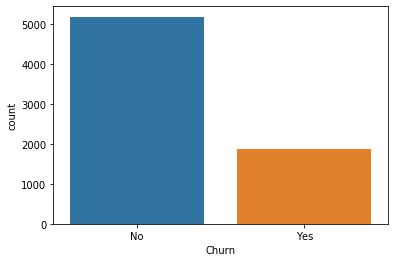

In [11]:
#Churn Distribution
sns.countplot(data=df,x='Churn');

### Numerical Features

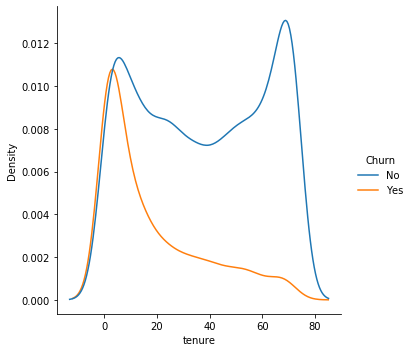

In [12]:
#Tenure distribution by Churn 
sns.displot(data=df, x="tenure", hue="Churn", kind="kde");

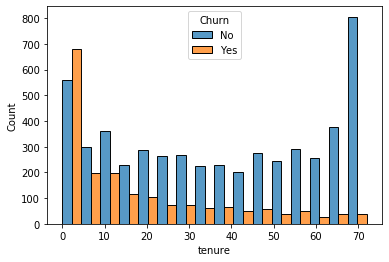

In [13]:
sns.histplot(x='tenure',data=df,multiple="dodge",hue='Churn');

In [14]:
print(f"The mean Tenure of Churn Customers is {round(df[df['Churn'] == 'Yes']['tenure'].mean(),2)}\
      \nThe mean Tenure of Non-churn Customers is {round(df[df['Churn'] == 'No']['tenure'].mean(),2)}")


The mean Tenure of Churn Customers is 17.98      
The mean Tenure of Non-churn Customers is 37.57


Recent customers are the ones who tend to churn more often. On the other hand, old customers don't tend to drop out.

In [15]:
print(f"The mean Total Charges of Churn Customers is {round(df[df['Churn'] == 'Yes']['TotalCharges'].mean(),2)}\
      \nThe mean Total Charges of Non-churn Customers is {round(df[df['Churn'] == 'No']['TotalCharges'].mean(),2)}")


The mean Total Charges of Churn Customers is 1531.79      
The mean Total Charges of Non-churn Customers is 2549.91


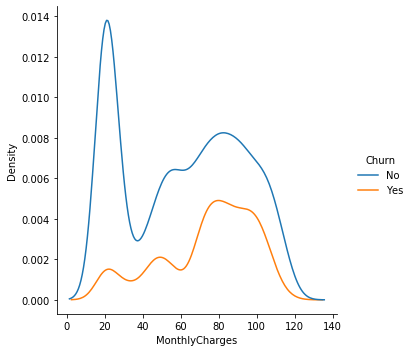

In [16]:
#Montly Charges distribution by Churn 
sns.displot(data=df, x="MonthlyCharges", hue="Churn", kind="kde");



In [17]:
print(f"The mean Monthly Charges of Churn Customers is {round(df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),2)}\
      \nThe mean Monthly Charges of Non-churn Customers is {round(df[df['Churn'] == 'No']['MonthlyCharges'].mean(),2)}")


The mean Monthly Charges of Churn Customers is 74.44      
The mean Monthly Charges of Non-churn Customers is 61.27


As the monthly charges tend to rise up so the tend to churn. We assume that reducing monthly charges could improve the churn rate.

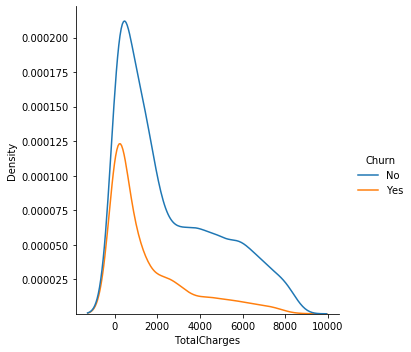

In [18]:
#Montly Charges distribution by Churn 
sns.displot(data=df, x="TotalCharges", hue="Churn", kind="kde");

In [19]:
perc =(df[df['Churn'] == 'Yes']['TotalCharges'].mean()/df[df['Churn'] == 'No']['TotalCharges'].mean())-1
a=round(df[df['Churn'] == 'Yes']['TotalCharges'].mean()/df[df['Churn'] == 'Yes']['tenure'].mean(),2)
b=round(df[df['Churn'] == 'No']['TotalCharges'].mean()/df[df['Churn'] == 'No']['tenure'].mean(),2)

print( f"On average clients who tend to churn spent {perc:.2%} less than the ones who dont. But people who churned pay a lot more in a ratio of total expenses/tenure. Churn: {a}, No Churn: {b} ")



On average clients who tend to churn spent -39.93% less than the ones who dont. But people who churned pay a lot more in a ratio of total expenses/tenure. Churn: 85.2, No Churn: 67.87 


### Categorical Features

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

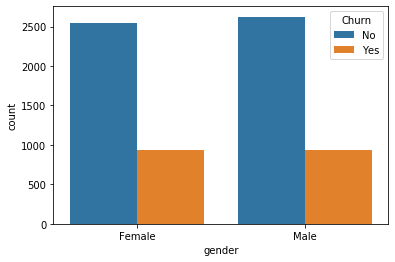

In [21]:
#Gender
sns.countplot(data=df,x='gender',hue='Churn');

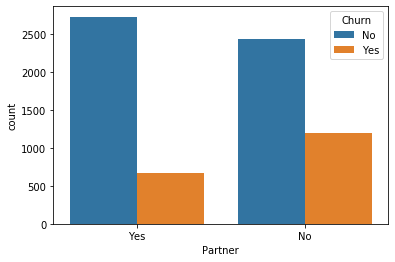

In [22]:
#Partner
sns.countplot(data=df,x='Partner',hue='Churn');

Churn rate of customer having a partner is lower than non-having a partner customer.

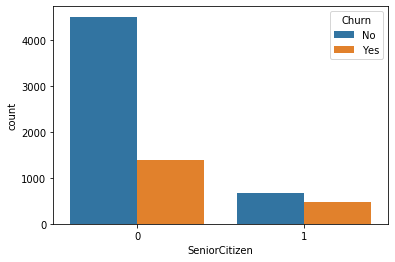

In [23]:
#Senior Citizen
sns.countplot(data=df,x='SeniorCitizen',hue='Churn');

In [24]:
df.groupby(['SeniorCitizen','Churn']).size()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64

In [25]:
a = 476/(476+666)
b = 1393/(1393+4508)
print(f"Even though the number of Senior citizen is significant lower than the rest of population. They dont have a similar churn rate: Senior Citizen {a: .2%}, Not Senior Citizen {b:.2%}")

Even though the number of Senior citizen is significant lower than the rest of population. They dont have a similar churn rate: Senior Citizen  41.68%, Not Senior Citizen 23.61%


### Mobile Services

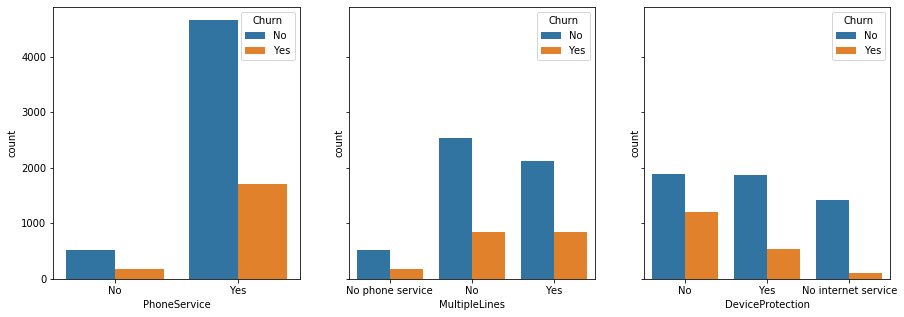

In [26]:
fig, axs =plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(ax=axs[0],data=df,x='PhoneService',hue='Churn')
sns.countplot(ax=axs[1],data=df,x='MultipleLines',hue='Churn')
sns.countplot(ax=axs[2],data=df,x='DeviceProtection',hue='Churn');

## Internet Services

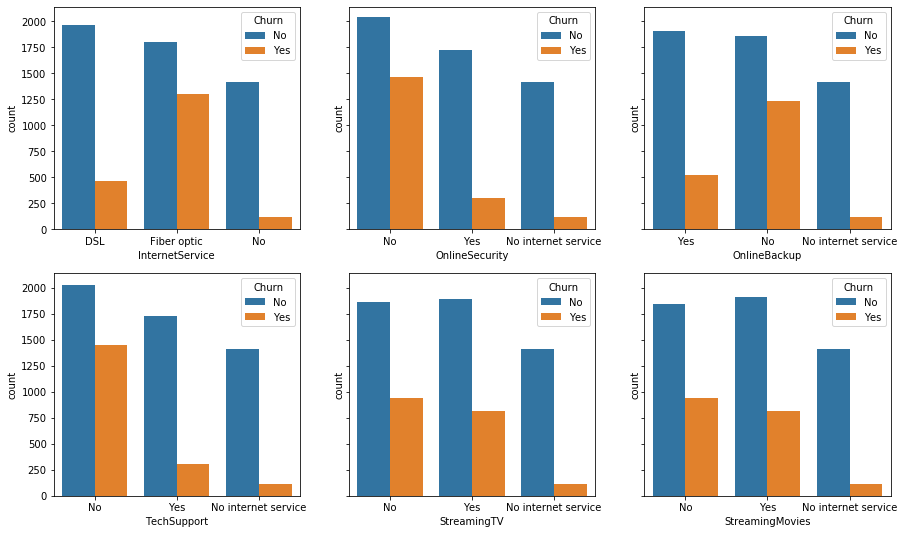

In [27]:
fig, axs =plt.subplots(2, 3, figsize=(15, 9), sharey=True)
sns.countplot(ax=axs[0,0],data=df,x='InternetService',hue='Churn')
sns.countplot(ax=axs[0,1],data=df,x='OnlineSecurity',hue='Churn')
sns.countplot(ax=axs[0,2],data=df,x='OnlineBackup',hue='Churn')
sns.countplot(ax=axs[1,0],data=df,x='TechSupport',hue='Churn')
sns.countplot(ax=axs[1,1],data=df,x='StreamingTV',hue='Churn')
sns.countplot(ax=axs[1,2],data=df,x='StreamingMovies',hue='Churn')

The interesting part here is that the vast majority of people who do not have access to some type of internet service have a very low churn rate. On the other side, the people that has Fiber Optic Internet Service has the highest churn rate above all. Online Security and Tech Support are important features too, the churn rate for both of them is quite different between having and no having 

### Type of Contract

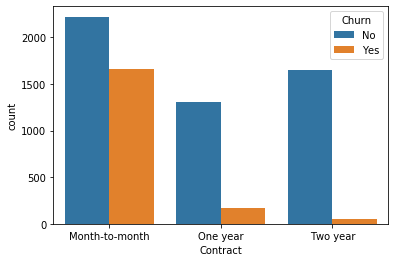

In [28]:
sns.countplot(data=df,x='Contract',hue='Churn');

## Payment and Billing

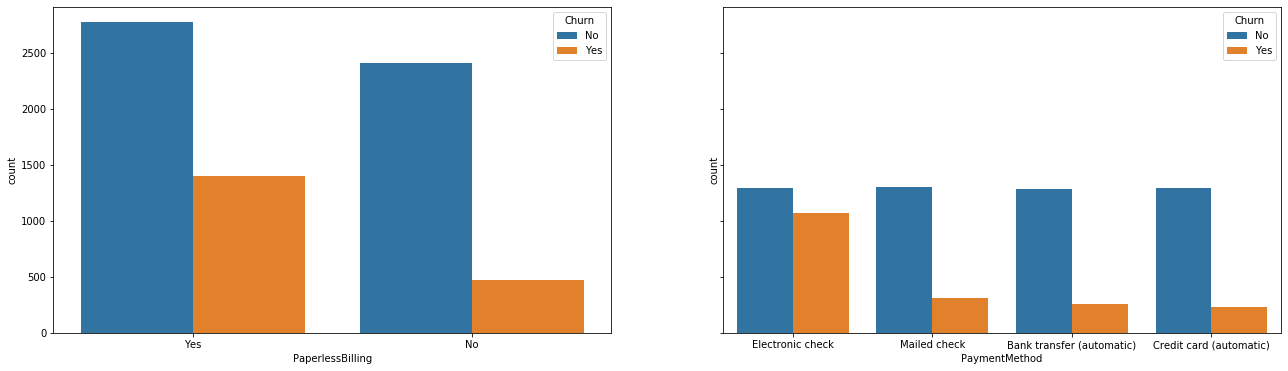

In [29]:
fig, axs =plt.subplots(1, 2, figsize=(22, 6), sharey=True)
sns.countplot(ax=axs[0],data=df,x='PaperlessBilling',hue='Churn')
sns.countplot(ax=axs[1],data=df,x='PaymentMethod',hue='Churn');

Paperless Billing and Electronic check once again has a relationship to the people that has and use internet services. Here I make the assumption that it is perhaps by terms of experience. 

People who have fiber optics, who don't have online backup, who don't have tech support, who use their cell phones, and monthly they have higher fees may not be satisfied with their experience with the program or the service and are more likely to leave. User Experience and customer service may be the key factors that could retain clients.

# Prediction Models

### Preprocessing Data

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [31]:
#Let's convert all the categorical variables into dummy variables
df['Churn'] = df.Churn.replace({"Yes":1,"No":0})
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.850000,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.500000,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.150002,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.750000,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.649994,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [32]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [33]:
#Now we drop features with two unique values
df = df.drop(['gender_Female', 'Partner_No','Dependents_No', 'PhoneService_No', 'PaperlessBilling_No'],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.850000,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1889.500000,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,2,53.85,108.150002,1,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,1840.750000,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.649994,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0


In [34]:
#Many machine learning algorithms perform better or converge faster when features are normally distributed.
#Therfore we will standardize our  Numerical Features
from sklearn.preprocessing import StandardScaler
df[['tenure', 'MonthlyCharges','TotalCharges']] = StandardScaler().fit_transform(df[['tenure', 'MonthlyCharges','TotalCharges']])

In [35]:
df.describe()[["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,5.945991e-17,-8.291599e-17,5.088457e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825805e+00


In [36]:
#Correlation between target Value: Churn
df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Male                               -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

In [37]:
#Split the data for target value
X = df.drop("Churn",axis=1)
y = df.Churn

In [38]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,0.066327,-0.259629,-0.172165,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0.514251,-0.746535,-0.193672,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,-1.236724,0.197365,-0.938874,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,1,1,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
7039,0,1.613701,1.277533,2.242606,0,1,1,1,0,0,...,0,1,0,1,0,1,0,1,0,0
7040,0,-0.870241,-1.168632,-0.852932,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
7041,1,-1.155283,0.320338,-0.870513,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [39]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [40]:
#Split in Train & Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## 1. K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier #KNN model
from sklearn.metrics import accuracy_score #Accuracy Score
from sklearn.model_selection import GridSearchCV


#Using Grid Search we will obtain the 'N' value that maximizes our accuracy

#Initialize the model 
knn = KNeighborsClassifier()

#Values of search (1-100)
param_grid = list(range(1,100))
param_grid = dict(n_neighbors=param_grid)

  
# Defining the function with the parameters, setting 'accuracy'
#And using a 10 fold cross validation 
grid = GridSearchCV(knn, param_grid, scoring='accuracy', cv=10,n_jobs=-1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [70]:
#Print the optimal
acc = grid_search.best_score_ 
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print(f"accuracy : {acc: .2%}")

Accuracy for our training dataset with {'n_neighbors': 84} is:  79.37%


## 2. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

#Hyperparameters to tune.
# C penalty strenght, Penalty: None,l1 lasso, l2 ridge, elasticnet.
#Lasso will eliminate many features, Ridge doesnt it minimizes them
# Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge
grid={"C":np.logspace(-3,3,50), "penalty":['l1', 'l2', 'elasticnet']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,scoring='accuracy',cv=10,n_jobs=-1)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.32...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7

In [43]:
acc = logreg_cv.best_score_ 
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(f"accuracy : {acc: .2%}")

tuned hpyerparameters :(best parameters)  {'C': 6.25055192527397, 'penalty': 'l2'}
accuracy :  80.24%


## 3. Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC
#Hyperparameters to tune.
#C: adds a penalty for each missclassified data point. If C is small less penalty, and viceversa.
#Kernel Trick: Data points that are not linearly separable are transformed using kernel functions 
param_grid = {'C': [0.001, 0.01, .1, 1, 10,100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid',]}
 
svm_grid = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy',n_jobs=-1) 
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
#SVM Accuracy
acc = svm_grid.best_score_ 
print("tuned hpyerparameters :(best parameters) ",svm_grid.best_params_)
print(f"accuracy : {acc: .2%}")

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'kernel': 'linear'}
accuracy :  79.70%


## 4. Artificial Neural Network (Deep Learning)

In [46]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout


values = np.arange(0,0.5,0.01)
all_train, all_test = list(), list()
for param in values:
    model = Sequential()
    #First Layer
    model.add(Dense(32,activation='relu',kernel_initializer='uniform',input_dim=X_train.shape[1]))
    model.add(Dropout(param))
    #Second Layer
    model.add(Dense(5,activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(param))
    #Third Layer
    model.add(Dense(1,activation='sigmoid'))


    #Compile the Model
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=0,validation_data=(X_test, y_test))

    
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)


Param: 0.000000, Train: 0.817, Test: 0.800
Param: 0.010000, Train: 0.819, Test: 0.817
Param: 0.020000, Train: 0.815, Test: 0.806
Param: 0.030000, Train: 0.819, Test: 0.804
Param: 0.040000, Train: 0.818, Test: 0.814
Param: 0.050000, Train: 0.824, Test: 0.807
Param: 0.060000, Train: 0.819, Test: 0.805
Param: 0.070000, Train: 0.823, Test: 0.810
Param: 0.080000, Train: 0.816, Test: 0.811
Param: 0.090000, Train: 0.822, Test: 0.815
Param: 0.100000, Train: 0.828, Test: 0.808
Param: 0.110000, Train: 0.826, Test: 0.804
Param: 0.120000, Train: 0.817, Test: 0.815
Param: 0.130000, Train: 0.824, Test: 0.803
Param: 0.140000, Train: 0.816, Test: 0.805
Param: 0.150000, Train: 0.826, Test: 0.805
Param: 0.160000, Train: 0.823, Test: 0.806
Param: 0.170000, Train: 0.831, Test: 0.807
Param: 0.180000, Train: 0.832, Test: 0.809
Param: 0.190000, Train: 0.821, Test: 0.808
Param: 0.200000, Train: 0.825, Test: 0.804
Param: 0.210000, Train: 0.817, Test: 0.808
Param: 0.220000, Train: 0.827, Test: 0.809
Param: 0.23

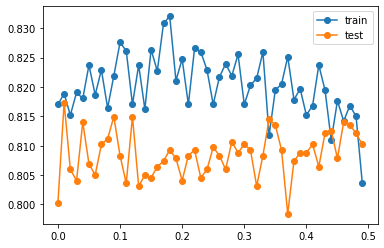

In [48]:
from matplotlib import pyplot
# plot train and test means
pyplot.plot(values, all_train, label='train', marker='o')
pyplot.plot(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
#We will add early stopping for  prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=25)

model = Sequential()
#First Layer
model.add(Dense(32,activation='relu',kernel_initializer='uniform',input_dim=X_train.shape[1]))
model.add(Dropout(0.18))
#Second Layer
model.add(Dense(5,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.18))
#Third Layer
model.add(Dense(1,activation='sigmoid'))


#Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
#History of the model 
history=model.fit(X_train,y_train,batch_size=64,epochs=1000,callbacks=[early_stopping],verbose=1,validation_data=(X_test, y_test))
    

Epoch 1/1000
78/78 [==============================] - 1s 7ms/step - loss: 0.5727 - accuracy: 0.7201 - val_loss: 0.4302 - val_accuracy: 0.7501
Epoch 2/1000
78/78 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7280 - val_loss: 0.4157 - val_accuracy: 0.7501
Epoch 3/1000
78/78 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7280 - val_loss: 0.4107 - val_accuracy: 0.7501
Epoch 4/1000
78/78 [==============================] - 0s 6ms/step - loss: 0.4549 - accuracy: 0.7619 - val_loss: 0.4036 - val_accuracy: 0.7998
Epoch 5/1000
78/78 [==============================] - 0s 5ms/step - loss: 0.4469 - accuracy: 0.7757 - val_loss: 0.4046 - val_accuracy: 0.7989
Epoch 6/1000
78/78 [==============================] - 1s 7ms/step - loss: 0.4467 - accuracy: 0.7819 - val_loss: 0.4024 - val_accuracy: 0.8031
Epoch 7/1000
78/78 [==============================] - 0s 6ms/step - loss: 0.4454 - accuracy: 0.7838 - val_loss: 0.3969 - val_accuracy: 0.8050
Epoch 

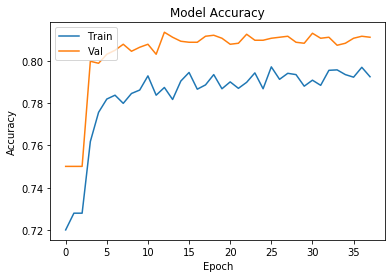

In [55]:
#Learning Curve-Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

Why Val-accuracy is greater than the test?

I've made it artificially harder for the network, because some of the information about each sample is drop. During validation all of the units are available, so the network might perform better than in training.

In [58]:
#Accuracy 
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.813, Test: 0.811


The ANN model has the great accuracy above all models. We now procede to analyze it.

In [64]:
#Predict
y_pred = model.predict(X_test)
y_pred = (y_pred>.5).astype('int')
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

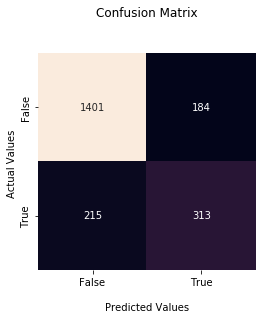

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1585
           1       0.63      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(y_test,y_pred))

Our Accuracy is 81%, while our  precision is 75 % which is good for this model as it's above 50%.

### Limitations & Improvements

Our ANN  is an efficient approach, but we can achieve a higher accuracy by selecting and studying optimal parameters such as:

- Increase hidden Layers or/and number of neurons.
- More Data (Age variable would be an interesting one)
- Add more regularizers 
- Droping some features (Principal Component Analysis, etc)

# Conclusions


In the present study, a set of 20 features were studied with 7043 different observations to analyze the churn behavior. We discovered different correlations between the features, mainly on the people who have access to internet services and the tenure duration. Variables such as gender does not have an important impact to the churn ratio.

We built  different models with different hyperparametrs to optimeze its accuracy on the test data. The neural network model which best predicted and have a higher accuracy, has been trained by back propagation algorithm. We added a drop out regulator and early stopping to prevent overfitting. The results testing and validating sets equaled 81.3% and 81.1%, respectively. It was shown that ANN is a acceptable tool for prediction of the chain.

In conclusion, according to the data to prevent a higher ratio churn we could:

1. Engagement Plan: 

Once the clients purchase/suscribe our product what are their goals with it. How they're going to use it and create a path that lines up.

2. Identify At-Risk Customers:

As we saw in the data, in early customers the monthly charges were higher, identify these trends and in order to smooth the effects.

3. Segment Customer feedback:

According to the data, improving our communication channels, regarding the type of customer will have a positive growth in the customer volume and our churn ratio.

4. Improve User Experience:  

Now a days everything is digital, so to have a nice experience with the platform or the technical services must be guaranteed to keep the clients.

5. Offer discounted long-term contracts: 

 Last but not least, offering long-term contracts will increase our tenure mean and with this our total revenue. Having the last 4 points will make easier the resuscription of the clients.

